In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras as keras
import tensorflow as tf
import coremltools as ct

In [2]:
def LoadDataset(dataset_path):
    
    # 載入帶有標籤的 dataset
    df = pd.read_csv(dataset_path)
    df = df.drop(labels="filename", axis=1)
    
    # 取得 features, labels
    labels = df.iloc[:,-1]
    features = df.iloc[:, :-1]
    
    return features, labels

In [23]:
def CNN(X, label_num):
    
    # 建立神經網絡架構
    model=keras.models.Sequential([
        
        # 輸入層
        keras.layers.Flatten(input_shape=(X.shape[1],)),
        keras.layers.Dropout(0.2),
        
        # 第一層隱藏層
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(0.2),
        
        # 第二層隱藏層
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.2),
        
        # 第三層隱藏層
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        
        # 第四層隱藏層
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        
        # 第五層隱藏層
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.2),

        # 輸出層
        keras.layers.Dense(label_num, activation='softmax'),
    ])

    return model

In [4]:
def ValidationPlot(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [5]:
def SamepleTest(model, X, y):
    # 執行預測
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Expected label: {}, Predicted label: {}".format(y, predicted_index))

### Training Mood CNN Classsifier

**version1** \
learning_rate=0.001, batch_size=32, epochs=30 \

Encoded: 0, Class: calm
Encoded: 1, Class: energetic
Encoded: 2, Class: happy
Encoded: 3, Class: sad
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 40)                0         
                                                                 
 dropout_78 (Dropout)        (None, 40)                0         
                                                                 
 dense_78 (Dense)            (None, 512)               20992     
                                                                 
 dropout_79 (Dropout)        (None, 512)               0         
                                                                 
 dense_79 (Dense)            (None, 256)               131328    
                                                                 
 dropout_80 (Dropout)        (None, 256)               0         
                  

107/107 [==============================] - 0s 3ms/step - loss: 0.3204 - accuracy: 0.8700 - val_loss: 0.0860 - val_accuracy: 0.9818
Epoch 43/600
107/107 [==============================] - 0s 3ms/step - loss: 0.3149 - accuracy: 0.8795 - val_loss: 0.0866 - val_accuracy: 0.9812
Epoch 44/600
107/107 [==============================] - 0s 3ms/step - loss: 0.3227 - accuracy: 0.8735 - val_loss: 0.0854 - val_accuracy: 0.9836
Epoch 45/600
107/107 [==============================] - 0s 3ms/step - loss: 0.3231 - accuracy: 0.8706 - val_loss: 0.0809 - val_accuracy: 0.9818
Epoch 46/600
107/107 [==============================] - 0s 3ms/step - loss: 0.3225 - accuracy: 0.8725 - val_loss: 0.0812 - val_accuracy: 0.9824
Epoch 47/600
107/107 [==============================] - 0s 3ms/step - loss: 0.3027 - accuracy: 0.8795 - val_loss: 0.0721 - val_accuracy: 0.9847
Epoch 48/600
107/107 [==============================] - 0s 3ms/step - loss: 0.3065 - accuracy: 0.8817 - val_loss: 0.0763 - val_accuracy: 0.9836
Epoch

Epoch 99/600
107/107 [==============================] - 0s 3ms/step - loss: 0.2602 - accuracy: 0.8970 - val_loss: 0.0794 - val_accuracy: 0.9783
Epoch 100/600
107/107 [==============================] - 0s 3ms/step - loss: 0.2497 - accuracy: 0.8995 - val_loss: 0.0650 - val_accuracy: 0.9830
Epoch 101/600
107/107 [==============================] - 0s 3ms/step - loss: 0.2489 - accuracy: 0.9011 - val_loss: 0.0708 - val_accuracy: 0.9812
Epoch 102/600
107/107 [==============================] - 0s 3ms/step - loss: 0.2496 - accuracy: 0.9007 - val_loss: 0.0704 - val_accuracy: 0.9812
Epoch 103/600
107/107 [==============================] - 0s 3ms/step - loss: 0.2592 - accuracy: 0.8941 - val_loss: 0.0909 - val_accuracy: 0.9754
Epoch 104/600
107/107 [==============================] - 0s 3ms/step - loss: 0.2568 - accuracy: 0.8992 - val_loss: 0.0748 - val_accuracy: 0.9789
Epoch 105/600
107/107 [==============================] - 0s 3ms/step - loss: 0.2559 - accuracy: 0.8995 - val_loss: 0.0758 - val_acc

107/107 [==============================] - 0s 3ms/step - loss: 0.2391 - accuracy: 0.9014 - val_loss: 0.0691 - val_accuracy: 0.9818
Epoch 156/600
107/107 [==============================] - 0s 3ms/step - loss: 0.2266 - accuracy: 0.9089 - val_loss: 0.0685 - val_accuracy: 0.9824
Epoch 157/600
107/107 [==============================] - 0s 3ms/step - loss: 0.2241 - accuracy: 0.9149 - val_loss: 0.0684 - val_accuracy: 0.9818
Epoch 158/600
107/107 [==============================] - 0s 3ms/step - loss: 0.2503 - accuracy: 0.9005 - val_loss: 0.0737 - val_accuracy: 0.9789
Epoch 159/600
107/107 [==============================] - 0s 3ms/step - loss: 0.2326 - accuracy: 0.9102 - val_loss: 0.0756 - val_accuracy: 0.9800
Epoch 160/600
107/107 [==============================] - 0s 3ms/step - loss: 0.2191 - accuracy: 0.9129 - val_loss: 0.0668 - val_accuracy: 0.9830
Epoch 161/600
107/107 [==============================] - 0s 3ms/step - loss: 0.2210 - accuracy: 0.9130 - val_loss: 0.0809 - val_accuracy: 0.9812

107/107 [==============================] - 0s 3ms/step - loss: 0.2060 - accuracy: 0.9170 - val_loss: 0.0709 - val_accuracy: 0.9830
Epoch 212/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1993 - accuracy: 0.9197 - val_loss: 0.0710 - val_accuracy: 0.9800
Epoch 213/600
107/107 [==============================] - 0s 3ms/step - loss: 0.2064 - accuracy: 0.9203 - val_loss: 0.0557 - val_accuracy: 0.9842
Epoch 214/600
107/107 [==============================] - 0s 3ms/step - loss: 0.2014 - accuracy: 0.9203 - val_loss: 0.0743 - val_accuracy: 0.9754
Epoch 215/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1939 - accuracy: 0.9234 - val_loss: 0.0631 - val_accuracy: 0.9818
Epoch 216/600
107/107 [==============================] - 0s 3ms/step - loss: 0.2097 - accuracy: 0.9177 - val_loss: 0.0909 - val_accuracy: 0.9742
Epoch 217/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1974 - accuracy: 0.9215 - val_loss: 0.0689 - val_accuracy: 0.9842

107/107 [==============================] - 0s 3ms/step - loss: 0.1856 - accuracy: 0.9237 - val_loss: 0.0849 - val_accuracy: 0.9712
Epoch 268/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1868 - accuracy: 0.9271 - val_loss: 0.0992 - val_accuracy: 0.9707
Epoch 269/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1834 - accuracy: 0.9272 - val_loss: 0.0878 - val_accuracy: 0.9795
Epoch 270/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1878 - accuracy: 0.9225 - val_loss: 0.0744 - val_accuracy: 0.9800
Epoch 271/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1955 - accuracy: 0.9218 - val_loss: 0.0708 - val_accuracy: 0.9818
Epoch 272/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1953 - accuracy: 0.9230 - val_loss: 0.0785 - val_accuracy: 0.9765
Epoch 273/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1885 - accuracy: 0.9231 - val_loss: 0.0880 - val_accuracy: 0.9777

107/107 [==============================] - 0s 3ms/step - loss: 0.1695 - accuracy: 0.9337 - val_loss: 0.0813 - val_accuracy: 0.9730
Epoch 324/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1756 - accuracy: 0.9308 - val_loss: 0.0575 - val_accuracy: 0.9806
Epoch 325/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1657 - accuracy: 0.9365 - val_loss: 0.0713 - val_accuracy: 0.9824
Epoch 326/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1836 - accuracy: 0.9313 - val_loss: 0.0798 - val_accuracy: 0.9771
Epoch 327/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1778 - accuracy: 0.9290 - val_loss: 0.0781 - val_accuracy: 0.9759
Epoch 328/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1852 - accuracy: 0.9281 - val_loss: 0.0660 - val_accuracy: 0.9777
Epoch 329/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1723 - accuracy: 0.9365 - val_loss: 0.0729 - val_accuracy: 0.9765

107/107 [==============================] - 0s 3ms/step - loss: 0.1714 - accuracy: 0.9343 - val_loss: 0.0962 - val_accuracy: 0.9736
Epoch 380/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1754 - accuracy: 0.9309 - val_loss: 0.1137 - val_accuracy: 0.9712
Epoch 381/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1801 - accuracy: 0.9300 - val_loss: 0.1025 - val_accuracy: 0.9736
Epoch 382/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1736 - accuracy: 0.9305 - val_loss: 0.0990 - val_accuracy: 0.9748
Epoch 383/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1660 - accuracy: 0.9366 - val_loss: 0.0696 - val_accuracy: 0.9800
Epoch 384/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1731 - accuracy: 0.9297 - val_loss: 0.0738 - val_accuracy: 0.9777
Epoch 385/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1751 - accuracy: 0.9316 - val_loss: 0.1078 - val_accuracy: 0.9724

107/107 [==============================] - 0s 3ms/step - loss: 0.1614 - accuracy: 0.9357 - val_loss: 0.1093 - val_accuracy: 0.9689
Epoch 436/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1719 - accuracy: 0.9340 - val_loss: 0.0857 - val_accuracy: 0.9748
Epoch 437/600
107/107 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9378 - val_loss: 0.0987 - val_accuracy: 0.9718
Epoch 438/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1638 - accuracy: 0.9357 - val_loss: 0.0849 - val_accuracy: 0.9783
Epoch 439/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1679 - accuracy: 0.9334 - val_loss: 0.0950 - val_accuracy: 0.9736
Epoch 440/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1479 - accuracy: 0.9404 - val_loss: 0.0906 - val_accuracy: 0.9736
Epoch 441/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1631 - accuracy: 0.9352 - val_loss: 0.0825 - val_accuracy: 0.9754

107/107 [==============================] - 0s 3ms/step - loss: 0.1720 - accuracy: 0.9286 - val_loss: 0.0980 - val_accuracy: 0.9718
Epoch 492/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1546 - accuracy: 0.9396 - val_loss: 0.0760 - val_accuracy: 0.9748
Epoch 493/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1572 - accuracy: 0.9401 - val_loss: 0.0756 - val_accuracy: 0.9736
Epoch 494/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1544 - accuracy: 0.9398 - val_loss: 0.1303 - val_accuracy: 0.9689
Epoch 495/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1617 - accuracy: 0.9385 - val_loss: 0.1471 - val_accuracy: 0.9624
Epoch 496/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1474 - accuracy: 0.9428 - val_loss: 0.1227 - val_accuracy: 0.9677
Epoch 497/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1489 - accuracy: 0.9396 - val_loss: 0.0983 - val_accuracy: 0.9730

107/107 [==============================] - 0s 3ms/step - loss: 0.1515 - accuracy: 0.9385 - val_loss: 0.1040 - val_accuracy: 0.9742
Epoch 548/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1486 - accuracy: 0.9415 - val_loss: 0.1200 - val_accuracy: 0.9683
Epoch 549/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1566 - accuracy: 0.9369 - val_loss: 0.0894 - val_accuracy: 0.9759
Epoch 550/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1595 - accuracy: 0.9379 - val_loss: 0.0844 - val_accuracy: 0.9771
Epoch 551/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1581 - accuracy: 0.9374 - val_loss: 0.0606 - val_accuracy: 0.9800
Epoch 552/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1533 - accuracy: 0.9368 - val_loss: 0.1179 - val_accuracy: 0.9724
Epoch 553/600
107/107 [==============================] - 0s 3ms/step - loss: 0.1573 - accuracy: 0.9379 - val_loss: 0.1074 - val_accuracy: 0.9707

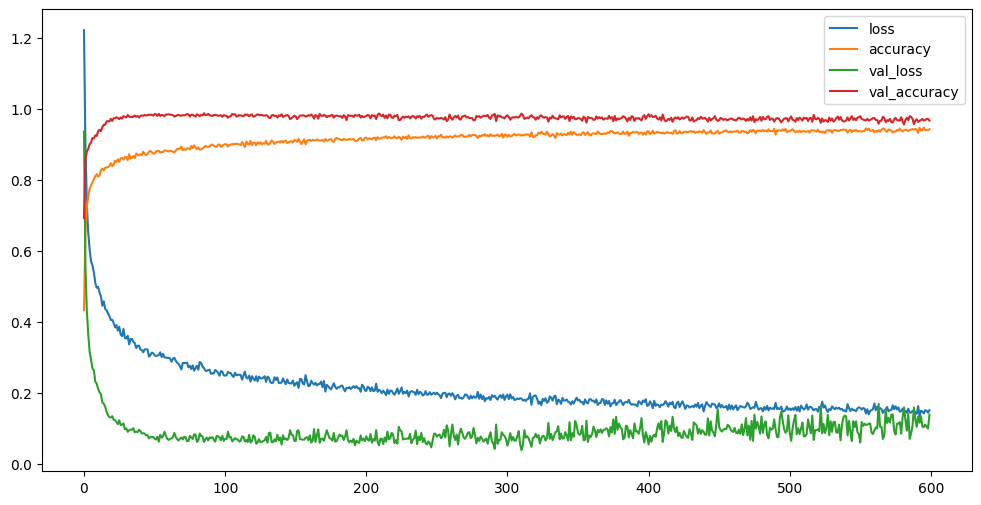

89/89 - 0s - loss: 0.1372 - accuracy: 0.9690 - 55ms/epoch - 617us/step

Test accuracy: 0.9690141081809998
12/12 [==============================] - 0s 1ms/step - loss: 0.1372 - accuracy: 0.9690
The test loss is  0.13718096911907196
The best accuracy is:  96.90141081809998
89/89 [==============================] - 0s 598us/step
Expected label: [1 0 3 ... 2 0 0], Predicted label: [1 0 3 ... 2 0 0]


In [33]:
label = 'mood'
label_num = 4

# 數據集CSV路徑
dataset_path = f'./input/{label}_feature.csv'

# 載入資料集
X, y = LoadDataset(dataset_path)

# 編碼標籤資料
convertor = LabelEncoder()
y = convertor.fit_transform(y)
for label, cls in enumerate(convertor.classes_):
    print(f"Encoded: {label}, Class: {cls}")

# 標準化資料集
scaler = StandardScaler()
X = scaler.fit_transform(np.array(X, dtype = float))

# 分成訓練集、測試集、驗證集 (0.6, 0.25, 0.15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# 創建卷積神經網絡
model = CNN(X, label_num)

optimiser = keras.optimizers.Adam(learning_rate=0.000146)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# 訓練模型
history = model.fit(X_train, 
                    y_train, 
                    validation_data=(X_validation, y_validation), 
                    batch_size=64, # 指定每次訓練所用的樣本數量（批次大小）
                    epochs=600) # 指定訓練的輪次

# 繪製圖形
ValidationPlot(history)

# 在測試集上評估模型
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=256)
print("The test loss is ", test_loss)
print("The best accuracy is: ", test_acc * 100)

# 測試樣本
SamepleTest(model, X_test, y_test)

In [20]:
model.build([1, 40])
model.save(f'./keras/{label}_classificasion_model.h5')

/Applications/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
# 執行預測
prediction = model.predict(X_test)
print(prediction)

labels = convertor.inverse_transform([0,1,2,3])
print(labels)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Expected label: {}, Predicted label: {}".format(y_test, predicted_index))

89/89 [==============================] - 0s 522us/step
[[5.6313444e-14 3.1033796e-08 9.9999988e-01 6.8840457e-08]
 [1.0587437e-04 4.6679332e-07 2.1479980e-05 9.9987221e-01]
 [7.4536577e-23 1.3686289e-13 1.0000000e+00 3.5627602e-13]
 ...
 [1.2851844e-12 4.8428568e-09 9.9842048e-01 1.5795686e-03]
 [2.1215155e-11 2.6044772e-14 6.0455201e-09 1.0000000e+00]
 [5.7117315e-09 1.1042533e-06 9.3239927e-01 6.7599587e-02]]
['calm' 'energetic' 'happy' 'sad']
Expected label: [2 3 2 ... 2 3 2], Predicted label: [2 3 2 ... 2 3 2]


### Training Occasion CNN Classifier

In [ ]:
label = 'occasion'
label_num = 8

# 數據集CSV路徑
dataset_path = f'./input/{label}_feature.csv'

# 載入資料集
X, y = LoadDataset(dataset_path)

# 編碼標籤資料
convertor = LabelEncoder()
y = convertor.fit_transform(y)
for label, cls in enumerate(convertor.classes_):
    print(f"Encoded: {label}, Class: {cls}")
    
# 標準化資料集
scaler = StandardScaler()
X = scaler.fit_transform(np.array(X, dtype = float))

# 分成訓練集、測試集、驗證集 (0.6, 0.25, 0.15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# 創建卷積神經網絡
model = CNN(X, label_num)

optimiser = keras.optimizers.Adam(learning_rate=0.00008)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary() 

# 訓練模型
history = model.fit(X_train, 
                    y_train, 
                    validation_data=(X_validation, y_validation), 
                    batch_size=32, # 指定每次訓練所用的樣本數量（批次大小）
                    epochs=100) # 指定訓練的輪次

# 繪製圖形
ValidationPlot(history)

# 在測試集上評估模型
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

test_loss, test_acc = model.evaluate(X_test,y_test,batch_size=256)
print("The test loss is ", test_loss)
print("The best accuracy is: ", test_acc * 100)

# 測試樣本
SamepleTest(model, X_test, y_test)

Encoded: 0, Class: awards
Encoded: 1, Class: coffee
Encoded: 2, Class: company
Encoded: 3, Class: gathering
Encoded: 4, Class: graduation
Encoded: 5, Class: seminar
Encoded: 6, Class: sports
Encoded: 7, Class: wedding
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 40)                0         
                                                                 
 dropout_102 (Dropout)       (None, 40)                0         
                                                                 
 dense_102 (Dense)           (None, 512)               20992     
                                                                 
 dropout_103 (Dropout)       (None, 512)               0         
                                                                 
 dense_103 (Dense)           (None, 256)               131328    
                                 

Epoch 41/100
1134/1134 [==============================] - 2s 2ms/step - loss: 0.4037 - accuracy: 0.8549 - val_loss: 0.8608 - val_accuracy: 0.7322
Epoch 42/100
1134/1134 [==============================] - 2s 2ms/step - loss: 0.4045 - accuracy: 0.8551 - val_loss: 1.0351 - val_accuracy: 0.6881
Epoch 43/100
1134/1134 [==============================] - 2s 2ms/step - loss: 0.4000 - accuracy: 0.8576 - val_loss: 0.9328 - val_accuracy: 0.7154
Epoch 44/100
1134/1134 [==============================] - 3s 2ms/step - loss: 0.3950 - accuracy: 0.8571 - val_loss: 1.0451 - val_accuracy: 0.6898
Epoch 45/100
1134/1134 [==============================] - 2s 2ms/step - loss: 0.3989 - accuracy: 0.8572 - val_loss: 0.9800 - val_accuracy: 0.7044
Epoch 46/100
1134/1134 [==============================] - 2s 2ms/step - loss: 0.3936 - accuracy: 0.8621 - val_loss: 1.0628 - val_accuracy: 0.6921
Epoch 47/100
1134/1134 [==============================] - 2s 2ms/step - loss: 0.3975 - accuracy: 0.8569 - val_loss: 0.9717 -

In [36]:
model.build([1, 40])
model.save(f'./keras/{label}_classificasion_model.h5')

/Applications/anaconda3/envs/tensorflow/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# 執行預測
prediction = model.predict(X_test)
print(prediction)

labels = convertor.inverse_transform([0,1,2,3,4,5,6,7])
print(labels)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Expected label: {}, Predicted label: {}".format(y_test, predicted_index))